<a href="https://www.kaggle.com/andreagariboldi/correlazione-tra-attacchi-di-cuore-e-features?scriptVersionId=84320945" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Importare le librerie**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# **Lettura dei dati**

In [2]:
data=pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# **Bilanciamento dei dati**

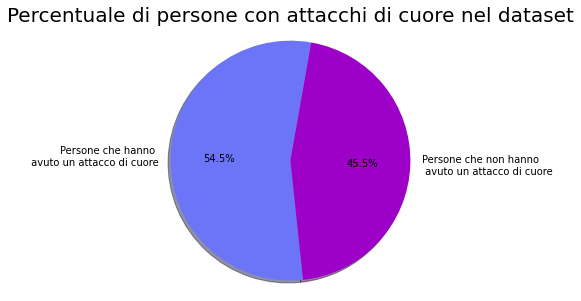

In [3]:
heart=Counter(data['output'])
classes=[]
count=[]   #list to store no of laels of each class
for i in heart.keys():
    classes.append(i)
    count.append(heart[i])
colors = ["#6C74F7", "#9D00C7"]
labels = ['Persone che hanno \n avuto un attacco di cuore', 'Persone che non hanno \n avuto un attacco di cuore']

plt.pie(
    count,
    labels = labels,
    shadow = True,
    colors = colors,
    startangle=80,
    autopct='%1.1f%%'
)
plt.axis('equal')
plt.tight_layout()
plt.title("Percentuale di persone con attacchi di cuore nel dataset", fontsize=20)
plt.show()
# fig = px.pie(df, names='output', title='Percentage of person with heart disease present in the dataset')
# fig.show()

Il 54% delle persone nel dataset hanno avuto un infarto, quindi i dati sono piuttosto bilanciati

# **Distribuzione delle features**

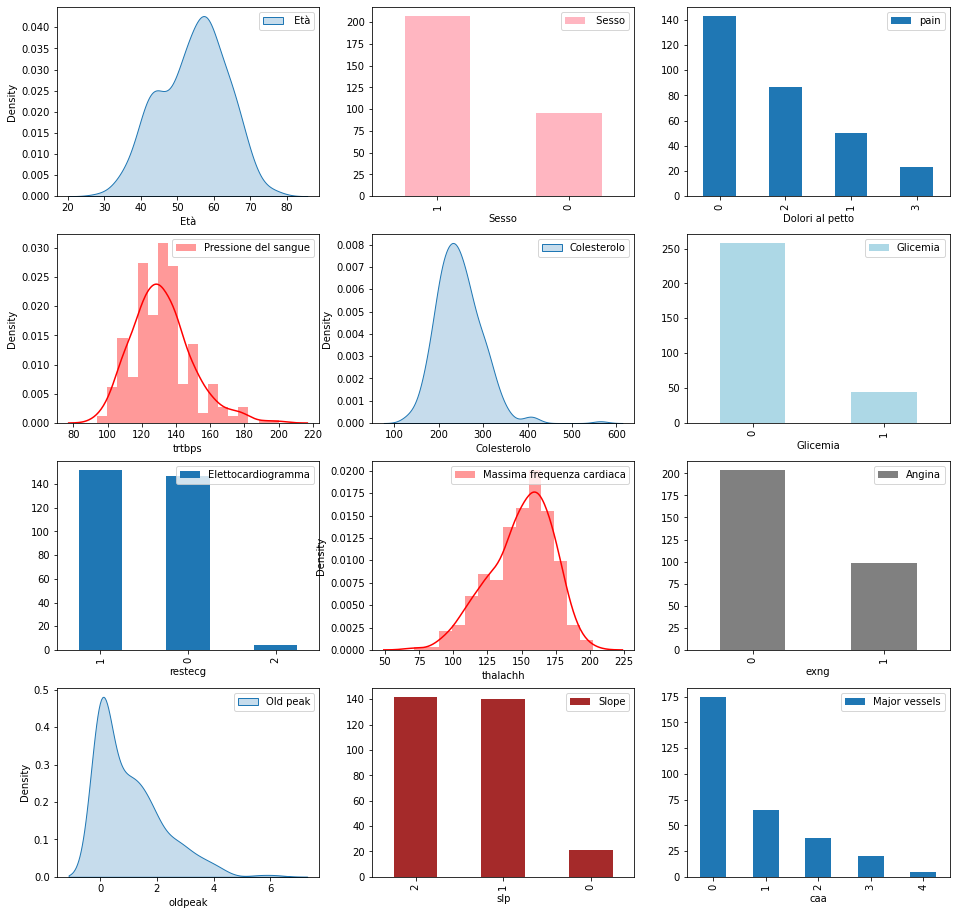

In [4]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(431)
sns.kdeplot(data['age'],shade=True,label=' Età')
# plt.title ('Distribuzione dell'età')
plt.xlabel('Età')
plt.legend()
fig = plt.subplot(432)
data['sex'].value_counts().plot(kind='bar',label=' Sesso', color="lightpink")
plt.xlabel('Sesso')
# plt.title ('Distribuzione dei sessi')
plt.legend()
fig = plt.subplot(433)
data['cp'].value_counts().plot(kind='bar',label='pain')
plt.xlabel('Dolori al petto')
# plt.title ('Distribuzione del dolore al petto')
plt.legend()
fig = plt.subplot(434)
# sns.kdeplot(data['trtbps'],shade=True,label='blood pressure')
sns.distplot(data['trtbps'], color="red",  kde= True,label='Pressione del sangue')
#plt.title ('Distribuzione della pressione del sangue')
plt.legend()
fig = plt.subplot(435)
sns.kdeplot(data['chol'],shade=True,label='Colesterolo')
# plt.title ('Distribuzione del colesterolo')
plt.xlabel('Colesterolo')
plt.legend()
fig = plt.subplot(436)
data['fbs'].value_counts().plot(kind='bar',label='Glicemia', color="lightblue")
plt.xlabel('Glicemia')
# plt.title ('Distribuzione della glicemia')
plt.legend()
fig = plt.subplot(437)
data['restecg'].value_counts().plot(kind='bar',label='Elettocardiogramma')
plt.xlabel('restecg')
# plt.title ('Distribuzione dell'elettrocardiogramma)
plt.legend()
fig = plt.subplot(438)
# sns.kdeplot(data['thalachh'],shade=True,label='Massima frequenza cardiaca')
sns.distplot(data['thalachh'], color="red",  kde= True,label='Massima frequenza cardiaca')
# plt.title ('Distribuzione della massima frequenza cardiaca')
plt.legend()
fig = plt.subplot(439)
data['exng'].value_counts().plot(kind='bar',label='Angina', color="grey")
plt.xlabel('exng')
# plt.title ('Distribuzione dell'angina (dolore al torace)')
plt.legend()
fig = plt.subplot(4,3,10)
sns.kdeplot(data['oldpeak'],shade=True,label='Old peak')
plt.xlabel('oldpeak')
# plt.title ('Distribution of old peak')
plt.legend()
fig = plt.subplot(4,3,11)
data['slp'].value_counts().plot(kind='bar',label='Slope', color="brown")
plt.xlabel('slp')
# plt.title ('Distribution of slope')
plt.legend()
fig = plt.subplot(4,3,12)
data['caa'].value_counts().plot(kind='bar',label='Major vessels')
plt.xlabel('caa')
# plt.title ('Distribution of no. of major vessels')
plt.legend()
plt.show()

In [5]:
heart = data[data['output']==1]['age'].fillna(0.0).astype(float)
heart_no = data[data['output']==0]['age'].fillna(0.0).astype(float)
fi = ff.create_distplot([heart, heart_no], ['Attacco di cuore','Senza attacco di cuore'], bin_size=0.65, curve_type='normal'
                        ,colors =  ['#E50914','#221F1F'])
fi.update_layout(
    title="Distribuzione degli attacchi di cuore rispetto all'età",
    xaxis_title="Età",
)
fi.show()
heart = data[data['output']==1]['thalachh'].fillna(0.0).astype(float)
heart_no = data[data['output']==0]['thalachh'].fillna(0.0).astype(float)
fi = ff.create_distplot([heart, heart_no], ['Attacco di cuore','Senza attacco di cuore'], bin_size=0.65, curve_type='normal'
                        ,colors =  ['#E50914','green'])
fi.update_layout(
    title="Distribuzione degli attacchi di cuore rispetto alla massima frequenza cardiaca",
    xaxis_title="Heart Rate",
)
fi.show()

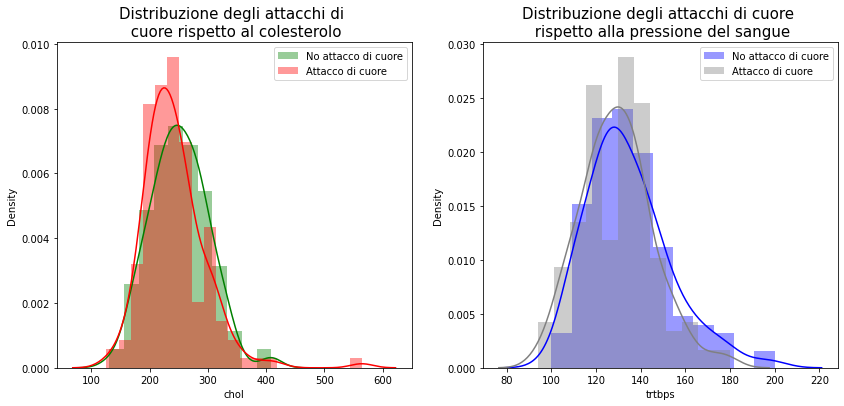

In [6]:
fig=plt.figure(figsize=(14, 6))
fig = plt.subplot(121)
sns.distplot(data[data['output'] == 0]["chol"], color='green',label='No attacco di cuore') 
sns.distplot(data[data['output'] == 1]["chol"], color='red',label='Attacco di cuore') 
plt.title('Distribuzione degli attacchi di \n cuore rispetto al colesterolo', fontsize=15)
plt.legend()
# plt.show()
fig = plt.subplot(122)
sns.distplot(data[data['output'] == 0]["trtbps"], color='blue',label='No attacco di cuore') 
sns.distplot(data[data['output'] == 1]["trtbps"], color='grey',label='Attacco di cuore') #Red for heart disease
plt.title('Distribuzione degli attacchi di cuore \n rispetto alla pressione del sangue', fontsize=15)
plt.legend()

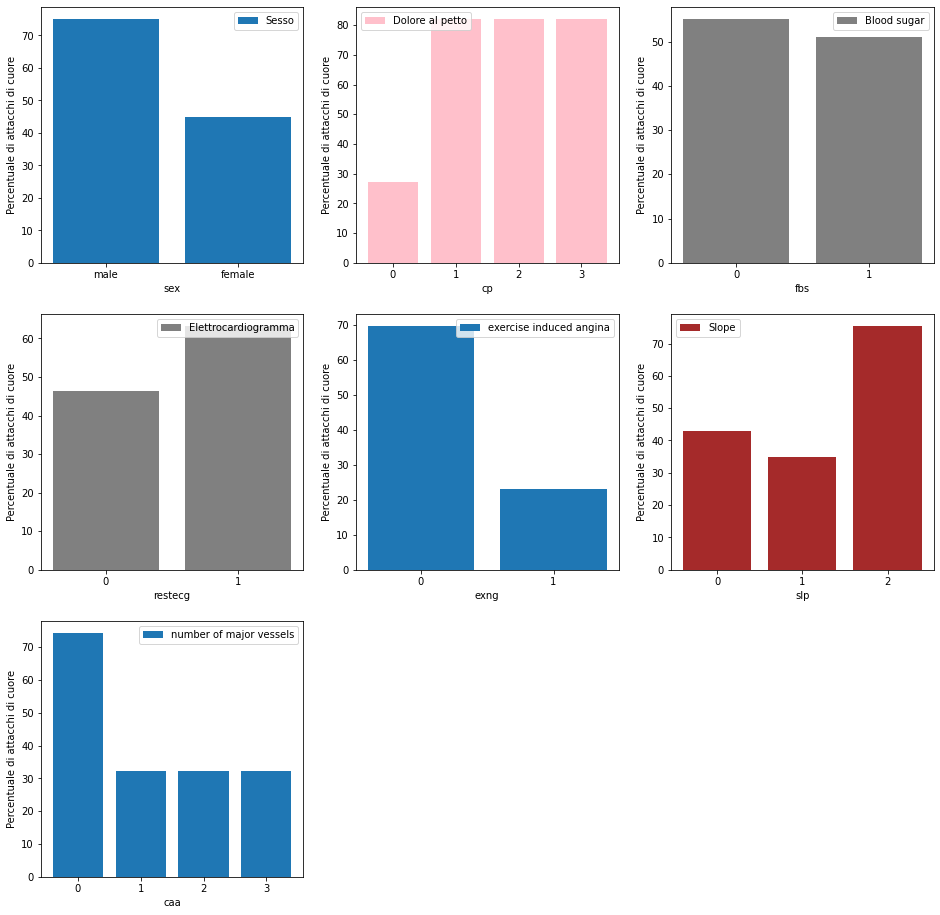

In [7]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(331)
df=data
name='sex'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["male","female"]
plt.bar(x,l,label='Sesso' )
plt.xlabel(name)
plt.ylabel('Percentuale di attacchi di cuore')
plt.legend()
fig = plt.subplot(332)
df=data
name='cp'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='Dolore al petto' , color="pink")
plt.xlabel(name)
plt.ylabel('Percentuale di attacchi di cuore')
plt.legend()

fig = plt.subplot(333)
name='fbs'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='Blood sugar', color="grey" )
plt.xlabel(name)
plt.ylabel('Percentuale di attacchi di cuore')
plt.legend()
fig = plt.subplot(334)
name='restecg'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='Elettrocardiogramma' , color="grey")
plt.xlabel(name)
plt.ylabel('Percentuale di attacchi di cuore')
plt.legend()

fig = plt.subplot(335)
name='exng'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='exercise induced angina' )
plt.xlabel(name)
plt.ylabel('Percentuale di attacchi di cuore')
plt.legend()
fig = plt.subplot(336)
name='slp'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
     (100)*df[df[name]==2]['output'].sum()/len(df[df[name]==2]['output'])]
x=["0","1",'2']
plt.bar(x,l,label='Slope' , color="brown")
plt.xlabel(name)
plt.ylabel('Percentuale di attacchi di cuore')
plt.legend()

fig = plt.subplot(337)
df=data
name='caa'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='number of major vessels' )
plt.xlabel(name)
plt.ylabel('Percentuale di attacchi di cuore')
plt.legend()